1
Epoch 1/10
57/57 [==============================] - 3s 18ms/step - loss: 0.7360 - accuracy: 0.6884 - val_loss: 0.8000 - val_accuracy: 0.6108
Epoch 2/10
57/57 [==============================] - 1s 12ms/step - loss: 0.6927 - accuracy: 0.7286 - val_loss: 0.6539 - val_accuracy: 0.7577
Epoch 3/10
57/57 [==============================] - 1s 13ms/step - loss: 0.6524 - accuracy: 0.7705 - val_loss: 0.6299 - val_accuracy: 0.7861
Epoch 4/10
57/57 [==============================] - 1s 14ms/step - loss: 0.6365 - accuracy: 0.7876 - val_loss: 0.6421 - val_accuracy: 0.7732
Epoch 5/10
57/57 [==============================] - 1s 20ms/step - loss: 0.6254 - accuracy: 0.7981 - val_loss: 0.7054 - val_accuracy: 0.7165
Epoch 6/10
57/57 [==============================] - 1s 13ms/step - loss: 0.6256 - accuracy: 0.7965 - val_loss: 0.6630 - val_accuracy: 0.7577
Epoch 7/10
57/57 [==============================] - 1s 11ms/step - loss: 0.6068 - accuracy: 0.8185 - val_loss: 0.6354 - val_accuracy: 0.7680
Epoch 8/10


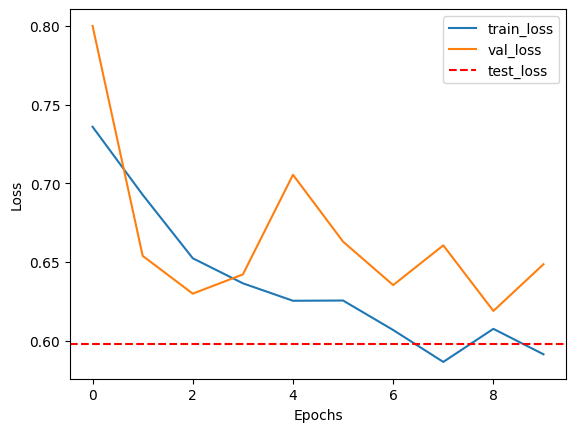

In [27]:
import tensorflow as tf
import numpy as np
import os
import cv2

if __name__ == "__main__":
    # Define the directory containing your images
    image_paths = "images"

    # Load and preprocess the images and create labels
    images = []
    labels = []

    for path in os.listdir(image_paths):
        #print(path)

        image = cv2.imread(os.path.join(image_paths,path), cv2.IMREAD_GRAYSCALE)  # Load as grayscale

        image = cv2.resize(image, (64, 64))  # Resize to a consistent size

        images.append(image)
        # Assuming image filenames contain information about whether they are "face" or "non-face"
        if "human" in path:
            labels.append(1)  # 1 for face
        else:
            labels.append(0)  # 0 for non-face

    X = np.array(images)
    y = np.array(labels)
    print(y[925])
    # Split the dataset into training, validation, and test sets
    from sklearn.model_selection import train_test_split

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Normalize pixel values to [0, 1]
    X_train = X_train / 255.0
    X_val = X_val / 255.0
    X_test = X_test / 255.0

    # Define your neural network model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(64, 64)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='hinge',  # Change to 'binary_crossentropy' for cross-entropy loss
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    # Plot training and validation loss
    import matplotlib.pyplot as plt

    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.axhline(y=test_loss, color='r', linestyle='--', label='test_loss')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
